# SIR model

We consider a simple SIR [compartmental model](https://en.wikipedia.org/w/index.php?title=Compartmental_models_in_epidemiology&oldid=950033707) to describe the evolution of an infectious disease. The SIR model consists of three compartments: **S** for the proportion of susceptible individuals in a given population, **I** for the proportion of infectious and **R** for the proportion of recovered. We denote by **p** the rate of infection, which depends on the contagiousness of the virus and the density of the population (that is the contacts between individuals), and by $\alpha$ the rate of recovery per unit of time. Then, the dynamics is

$$
\begin{align}
\dot{S} & = -pIS \\
\dot{I} & =  pIS - \alpha I \\
\dot{R} & = \alpha I
\end{align}
$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nutopy import ivp

In [2]:
def sir(t, x, pars):
    S, I, R = x
    p, alpha = pars
    y = np.zeros(x.size)
    y[0] = -p*I*S
    y[1] =  p*I*S - alpha*I
    y[2] = alpha*I
    return y

In [3]:
S0 = 0.95 # initial proportion of susceptible individuals
I0 = 0.05 # initial proportion of infectious individuals
R0 = 0.00 # initial proportion of recovered individuals
x0 = np.array([S0, I0, R0])

t0 = 0.0  # initial time
tf = 20.0 # final time

p     = 1.0 # rate of infection, depending on the contagiousness 
            # of the virus and the density of the population
alpha = 0.1 # rate of recovery per unit of time
pars  = np.array([p, alpha])

In [4]:
sol = ivp.exp(sir, tf, t0, x0, pars)

time = sol.tout

S = sol.xout[:,0]
I = sol.xout[:,1]
R = sol.xout[:,2]

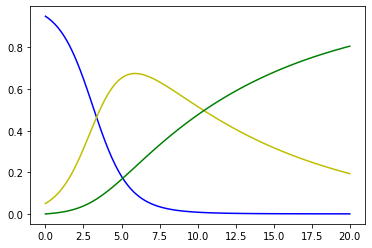

In [5]:
plt.plot(time, S, 'b', time, I, 'y', time, R, 'g');